### Logistic Regression

***

### Introduction:

### Logistic Regression is a widely used statistical method for binary classification problems, where the goal is to predict one of two possible outcomes. Unlike Linear Regression, which predicts continuous values, Logistic Regression predicts the probability that a given input belongs to a particular category. 

### It employs the logistic function, also known as the sigmoid function, to map predicted values to probabilities between 0 and 1. The model estimates the relationship between the dependent binary variable and one or more independent variables using maximum likelihood estimation. 

### Logistic Regression is interpretable and efficient, making it a popular choice for various applications such as spam detection, medical diagnosis, and credit scoring.

### In this section, we will work with a dataset which contains the age and interest of customers. Using these features, we will build a Logistic Regression model which predicts, if a product was sold successfully (1) or not (0). We will also apply some new techniques like Feature Scaling, visualize a Confusion Matrix and demonstrate the Decision Boundary.

***

### Importing libraries and data

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Importing data
df = pd.read_csv('classification.csv')
df.head()

,age,interest,success
0,23.657801,18.859917,0.0
1,22.573729,17.969223,0.0
2,32.553424,29.463651,0.0
3,6.718035,25.704665,1.0
4,14.401919,16.770856,0.0


### Visualizing the age and interest of customers by success. Success is a binary column:

### 0 = not successful | 1 = successful

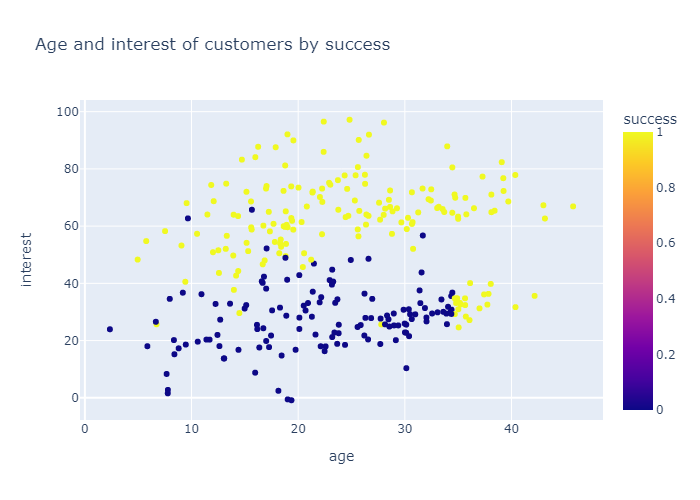

In [3]:
fig = px.scatter(df, x="age", y="interest", color="success", title="Age and interest of customers by success")
fig.show("png")

### Understanding feature scaling:

### Feature scaling is crucial in machine learning because it ensures that all features contribute equally to the model's learning process. Without scaling, features with larger magnitudes can disproportionately influence the model, leading to suboptimal performance. 

### Additionally, many algorithms, like gradient descent-based optimizations and distance-based methods (e.g., k-nearest neighbors, SVM), converge faster and perform better with scaled data.

### In the following code cell, feature scaling will be applied to the data. Then, the scaled data is going to be compared with the original data.

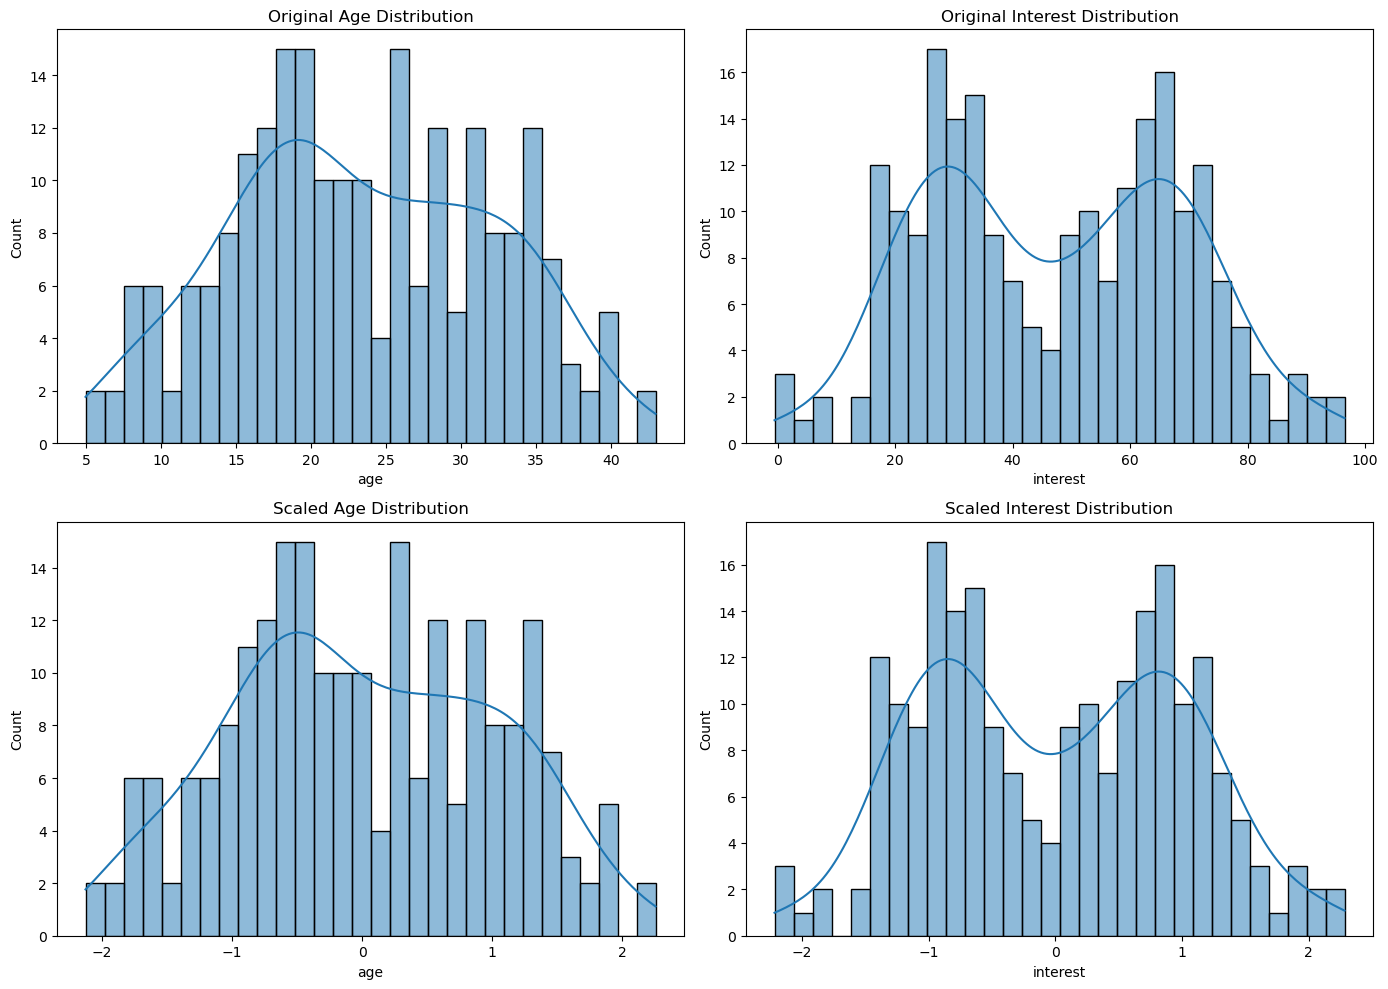

In [4]:
# Defining features
X = df[['age', 'interest']].values
y = df[['success']].values

# Performing the train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# Scaling the training and testing data
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert the data back to DataFrame for visualization
columns = ['age', 'interest']
X_train_df = pd.DataFrame(X_train, columns=columns)
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=columns)

# Visualizing the original and scaled data

# Histograms
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Original data histograms
sns.histplot(X_train_df['age'], bins=30, ax=axes[0, 0], kde=True)
axes[0, 0].set_title('Original Age Distribution')

sns.histplot(X_train_df['interest'], bins=30, ax=axes[0, 1], kde=True)
axes[0, 1].set_title('Original Interest Distribution')

# Scaled data histograms
sns.histplot(X_train_scaled_df['age'], bins=30, ax=axes[1, 0], kde=True)
axes[1, 0].set_title('Scaled Age Distribution')

sns.histplot(X_train_scaled_df['interest'], bins=30, ax=axes[1, 1], kde=True)
axes[1, 1].set_title('Scaled Interest Distribution')

plt.tight_layout()
plt.show("png")

### As can be seen from the charts above, the scaled data retains the original information within the data, but compresses the scale of the data to a format which is more suitable for ML models.

### Now we can build a Logistic Regression model using techniques like Feature Scaling and K-Fold Cross Validation.

In [5]:
# Defining features and target variable
X = df[['age', 'interest']].values
y = df[['success']].values

# Instantiate KFold with 3 splits
kf = KFold(n_splits=3, shuffle=True)

# Initialize a list to store accuracy scores
accuracy_scores = []

for train_index, test_index in kf.split(X):
    # Splitting the data into training and testing sets
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Scaling the training and testing data
    scaler = StandardScaler()
    scaler.fit(X_train)

    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Instantiate the model
    model = LogisticRegression()

    # Fitting the scaled data
    model.fit(X_train_scaled, y_train)

    # Making predictions on the scaled test data
    y_pred = model.predict(X_test_scaled)

    # Calculating and storing the accuracy score
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

# Outputting the average accuracy score
average_accuracy = sum(accuracy_scores) / len(accuracy_scores)
print('Average accuracy score with 3-Fold Cross Validation:', average_accuracy)

# Outputting the individual accuracy scores
print('Individual accuracy scores:', accuracy_scores)

Average accuracy score with 3-Fold Cross Validation: 0.8653198653198654
Individual accuracy scores: [0.8686868686868687, 0.8585858585858586, 0.8686868686868687]


### A confusion matrix helps to visualize the accuracy of the model

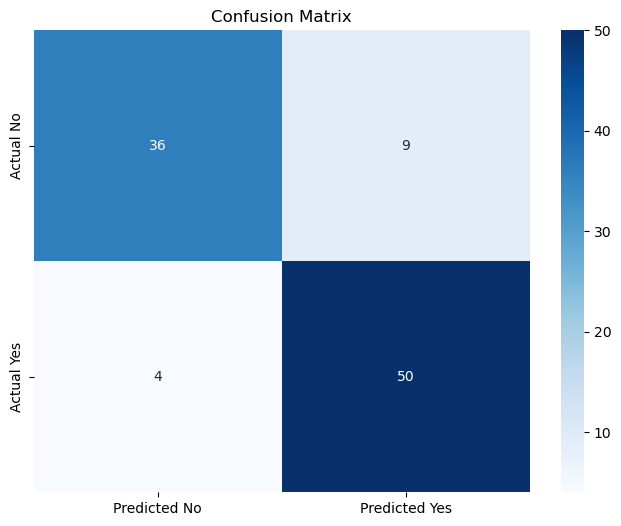

In [6]:
# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted No', 'Predicted Yes'], yticklabels=['Actual No', 'Actual Yes'])
plt.title('Confusion Matrix')
plt.show("png")

### Visualizing the decision boundary of the model

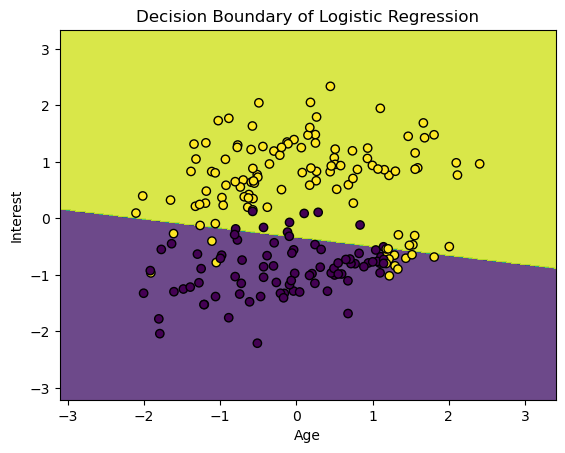

In [7]:
# Define a mesh grid (for 2 features)
x_min, x_max = X_train_scaled[:, 0].min() - 1, X_train_scaled[:, 0].max() + 1
y_min, y_max = X_train_scaled[:, 1].min() - 1, X_train_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Predict classifications for each point in the mesh grid
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the contour and training points
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=y_train, edgecolors='k', marker='o')
plt.xlabel('Age')
plt.ylabel('Interest')
plt.title('Decision Boundary of Logistic Regression')
plt.show("png")

***

### Conclusion:

### In this project, we applied Logistic Regression to predict the success of an outcome based on two features: age and interest. To ensure a robust evaluation of our model, we employed 3-Fold Cross Validation, which splits the data into three subsets, trains the model on two subsets, and validates it on the remaining subset. This process was repeated three times, each time using a different subset for validation. We scaled the data to standardize the features before training the model, ensuring that the model's performance was not influenced by the differing scales of the input features.

### The average accuracy score across the three folds was calculated to be 0.86, indicating a consistent performance of the Logistic Regression model. To further evaluate the model, we plotted the confusion matrix, which visually depicted the number of true positives, true negatives, false positives, and false negatives, providing insights into the model's classification performance.

### Finally, we visualized the decision boundary of the Logistic Regression model. This visualization, combined with a scatter plot of the training data, illustrated how the model separates the classes based on the features of age and interest.